In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("D:\seminar\Customers.csv")

In [7]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [9]:
df.loc[df["Age"].idxmax()]

CustomerID                   348
Gender                    Female
Age                           99
Annual Income ($)         184426
Spending Score (1-100)        41
Profession                Artist
Work Experience                9
Family Size                    1
Name: 347, dtype: object

In [10]:
df.loc[df["Age"].idxmin()]

CustomerID                   212
Gender                    Female
Age                            0
Annual Income ($)          22000
Spending Score (1-100)        92
Profession                Artist
Work Experience                2
Family Size                    1
Name: 211, dtype: object

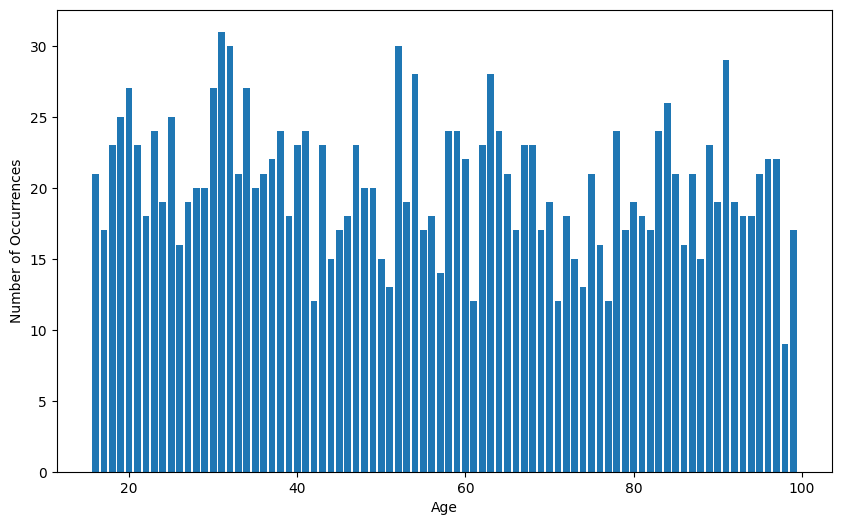

In [11]:
df_clean = df[df['Age'] >= 16]
age_counts = pd.Series(df_clean['Age']).value_counts().sort_index()

ages = age_counts.index
occurrences = age_counts.values

plt.figure(figsize=(10, 6))
plt.bar(ages, occurrences)
plt.xlabel('Age')
plt.ylabel('Number of Occurrences')
plt.show()

In [18]:
def laplace_mech(value, sensitivity, epsilon):
    noise = np.random.laplace(0, sensitivity / epsilon)
    return value + noise

epsilon = 1
occurrences_noisy = [laplace_mech(c, 1, epsilon) for c in occurrences]

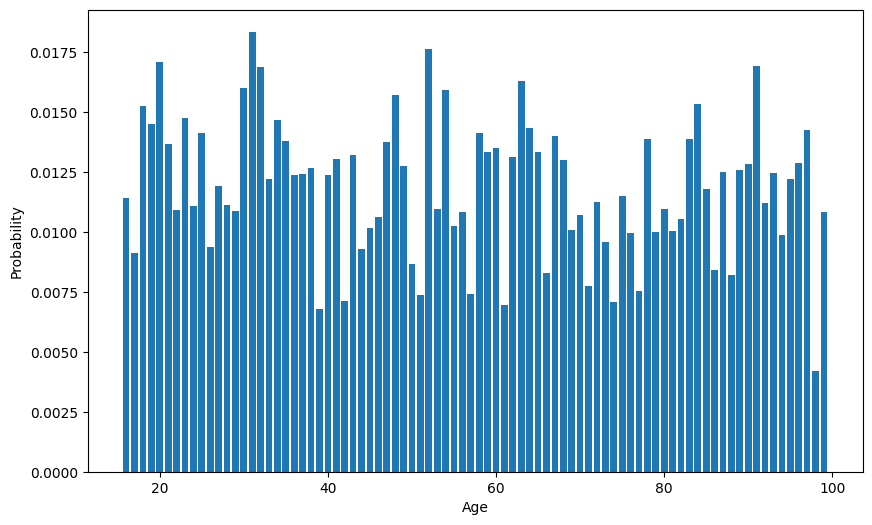

In [19]:
# Xử lý dữ liệu
dp_syn_rep_nn = np.clip(occurrences_noisy, 0, None)
syn_normalized = dp_syn_rep_nn / np.sum(dp_syn_rep_nn)

# Tạo biểu đồ chuẩn hóa
plt.figure(figsize=(10, 6))
plt.bar(ages, syn_normalized)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()